In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Data Preparation

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
strings  = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### Exploratory Data Analysis

In [9]:
# unique values in each column

for col in df.columns:
    print(col)
    print(df[col].unique()[:6])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series']
914

year
[2011 2012 2013 1992 1993 1994]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric']
10

engine_hp
[335. 300. 230. 320. 172. 160.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.  0.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance' 'flex_fuel']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback' '2dr_hatchback']
16

highway_mpg
[26 28 27 25 24 20]
59

city_mpg
[19 20 18 17 16 26]

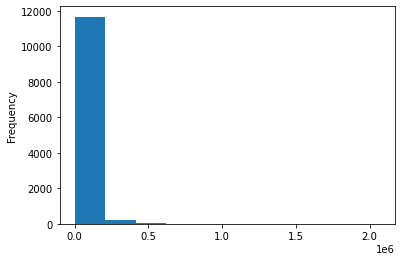

In [10]:
# using pandas plotting to visualize the histogram of car prices
df['msrp'].plot(kind = 'hist');

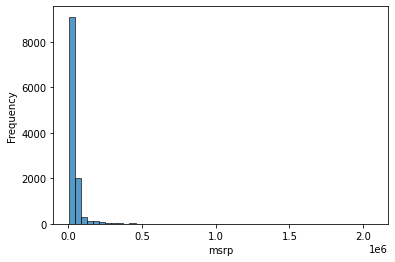

In [11]:
# seaborn alternative
sns.histplot(df['msrp'], bins=50)
plt.ylabel("Frequency");

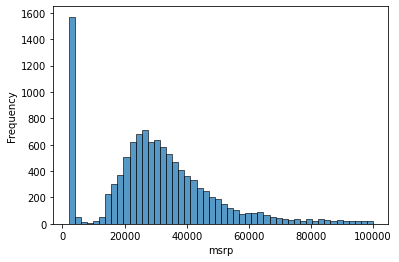

In [12]:
# distribution of prices less than 100000
sns.histplot(df.msrp[df['msrp'] < 100000], bins=50)
plt.ylabel("Frequency");

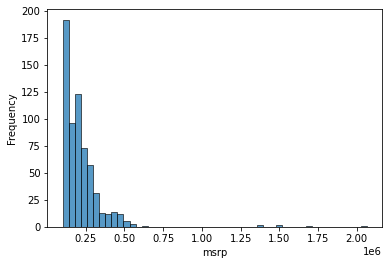

In [13]:
# distribution of prices more than 100000
sns.histplot(df.msrp[df['msrp'] > 100000], bins=50)
plt.ylabel("Frequency");

In [14]:
# normalzie price by the taking logarithm of price
price_log = np.log1p(df['msrp']) 

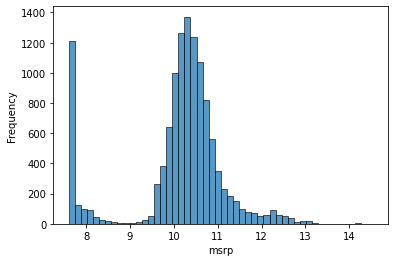

In [15]:
# histogram the price log
sns.histplot(price_log, bins=50)
plt.ylabel("Frequency");

In [16]:
# missinf values in the dataset 
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

#### Validation Framework

In [17]:
# length of df 
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

n_train = n - n_val - n_test

In [18]:

n_train,n_val,n_test

(7150, 2382, 2382)

In [19]:
# sequential splitting of data using the computed length
df_val = df.iloc[:n_val]

df_test = df.iloc[n_val:n_val + n_test]

df_train = df.iloc[n_val + n_test:]


In [20]:
# shuffling the data values using numpy
np.random.seed(2)

idx = np.arange(n)

np.random.shuffle(idx)

In [21]:
# collect our shuffled data points
df_val = df.iloc[idx[:n_val]]

df_test = df.iloc[idx[n_val:n_val + n_test]]

df_train = df.iloc[idx[n_val + n_test:]]

In [22]:
len(df_train),len(df_val),len(df_test)

(7150, 2382, 2382)

In [23]:
# reset index 

df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [24]:
# set the target variable

y_train = np.log1p(df_train['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)


In [25]:
del df_train['msrp']

del df_test['msrp'] 

del df_val['msrp']

#### Linear Regression

In [26]:
# python funtion to calculate for linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Baseline Model

In [27]:
# features to use for prediction of prices
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [28]:
# function to find the nupy array of our dataset
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [29]:
# find the linear regression of the training set 
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

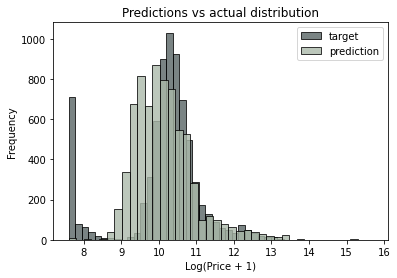

In [30]:
# histogram to visualize the predictions and the actual values
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#223232', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#abbaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

#### Root Mean Squared Error

In [31]:
# function to calculate for mean squared error 
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)


In [32]:
rmse(y_train,y_pred)

0.745130516822012

#### Model Validation

In [33]:
# use the linear regresion for the validation dataset
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)

In [34]:
# rmse score for validation dataset
rmse(y_val,y_pred_val)

0.7419381478118969

#### Feature Engineering

In [37]:
2017 - df_train.year

0        9
1        1
2        1
3        0
4       12
        ..
7145    19
7146     3
7147    11
7148     1
7149     2
Name: year, Length: 7150, dtype: int64

In [38]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year

    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [42]:
# find the linear regression of the training set with added features 
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
rmse(y_train,y_pred)

0.5138817849020834

In [44]:
# use the linear regresion for the validation dataset with added features
X_val = prepare_X(df_val)
y_pred_val = w_0 + X_val.dot(w)
rmse(y_val,y_pred_val)

0.5222394405268986